In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string 
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('test_tweets_anuFYb8.csv')
df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [4]:
def remove_pattern(input_txt, pattern):
    r=re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [5]:
df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [6]:
# remove twitter handles(@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")

In [7]:
df.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...","3rd #bihday to my amazing, hilarious #nephew..."


In [8]:
#remove speical characters numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone to see th...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your #acne #altwaystohe...
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",rd #bihday to my amazing hilarious #nephew...


In [9]:
#remove short words
df['clean_tweet']=df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacists want everyone #birds #mov...
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways heal your #acne #altwaystoheal #heal...
3,31966,is the hp and the cursed child book up for res...,cursed child book reservations already where w...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",#bihday amazing hilarious #nephew ahmir uncle ...


In [10]:
#indiviual words considered as tokens
tokenized_tweet= df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [#studiolife, #aislife, #requires, #passion, #...
1    [#white, #supremacists, want, everyone, #birds...
2    [safe, ways, heal, your, #acne, #altwaystoheal...
3    [cursed, child, book, reservations, already, w...
4    [#bihday, amazing, hilarious, #nephew, ahmir, ...
Name: clean_tweet, dtype: object

In [11]:
#stem the words
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda sentence:[stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [#studiolif, #aislif, #requir, #passion, #dedi...
1    [#white, #supremacist, want, everyon, #bird, #...
2    [safe, way, heal, your, #acn, #altwaystoh, #he...
3    [curs, child, book, reserv, alreadi, where, wh...
4    [#bihday, amaz, hilari, #nephew, ahmir, uncl, ...
Name: clean_tweet, dtype: object

In [12]:
  #combine words into a single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])
df['clean_tweet']=tokenized_tweet
df.head()

,id,tweet,clean_tweet
0,31963,#studiolife #aislife #requires #passion #dedic...,#studiolif #aislif #requir #passion #dedic #wi...
1,31964,@user #white #supremacists want everyone to s...,#white #supremacist want everyon #bird #movi here
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal your #acn #altwaystoh #healthi #...
3,31966,is the hp and the cursed child book up for res...,curs child book reserv alreadi where when #har...
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",#bihday amaz hilari #nephew ahmir uncl dave lo...


In [13]:
!pip install wordcloud --user

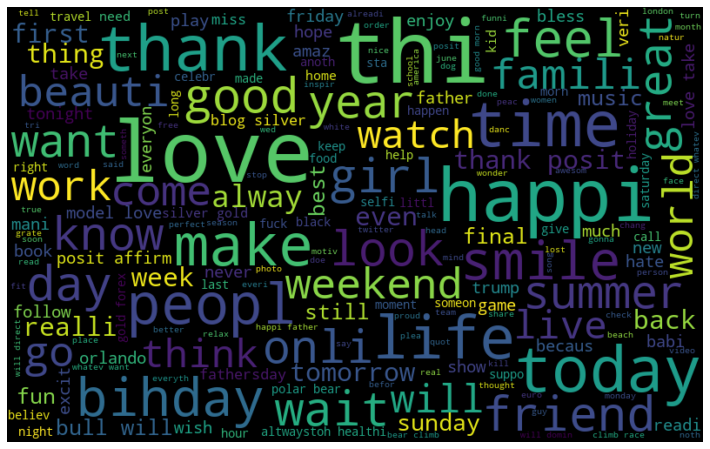

In [14]:
#display the frequent words
all_words=" ".join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800, height=500,random_state=42,max_font_size=100).generate(all_words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
#extract the hastag
def hashtag_extract(tweets):
    hashtags= []
#loop words in the tweet
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags
        

In [16]:
ht_positive=hashtag_extract(df['clean_tweet'][df['id']>=45000])
ht_negative=hashtag_extract(df['clean_tweet'][df['id']<=35000])

In [17]:
ht_positive[:5]

[['qriketfamili'],
 ['includ', 'whoiswithm'],
 ['loveisland'],
 ['caoblu', 'worldoceansday', 'destin'],
 []]

In [18]:
#unnest list
ht_positive= sum(ht_positive,[])
ht_negative= sum(ht_negative,[])

In [19]:
ht_positive[:5]

['qriketfamili', 'includ', 'whoiswithm', 'loveisland', 'caoblu']

In [20]:
freq= nltk.FreqDist(ht_positive)
d= pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,qriketfamili,1
1,includ,2
2,whoiswithm,1
3,loveisland,1
4,caoblu,1


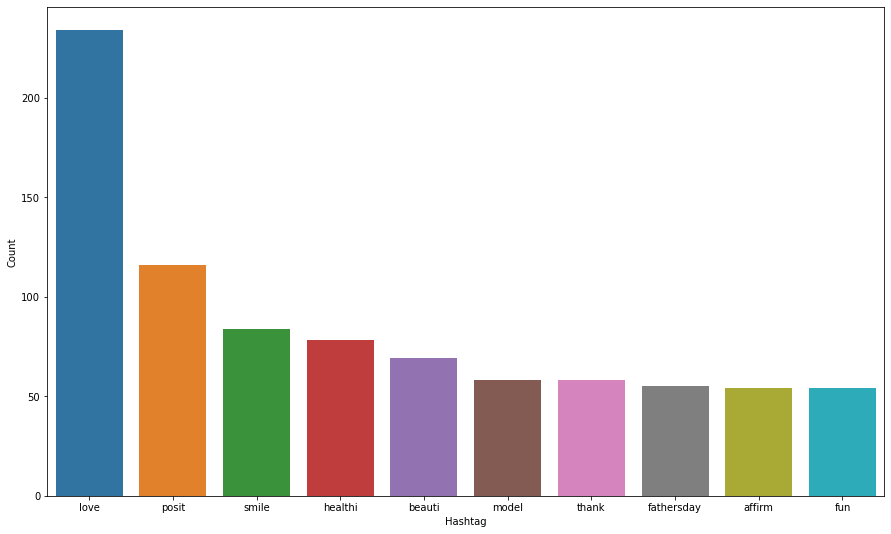

In [21]:
#select top 10 hastags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [22]:
freq= nltk.FreqDist(ht_negative)
d= pd.DataFrame({'Hashtag': list(freq.keys()),
                  'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,studiolif,1
1,aislif,1
2,requir,1
3,passion,5
4,dedic,1


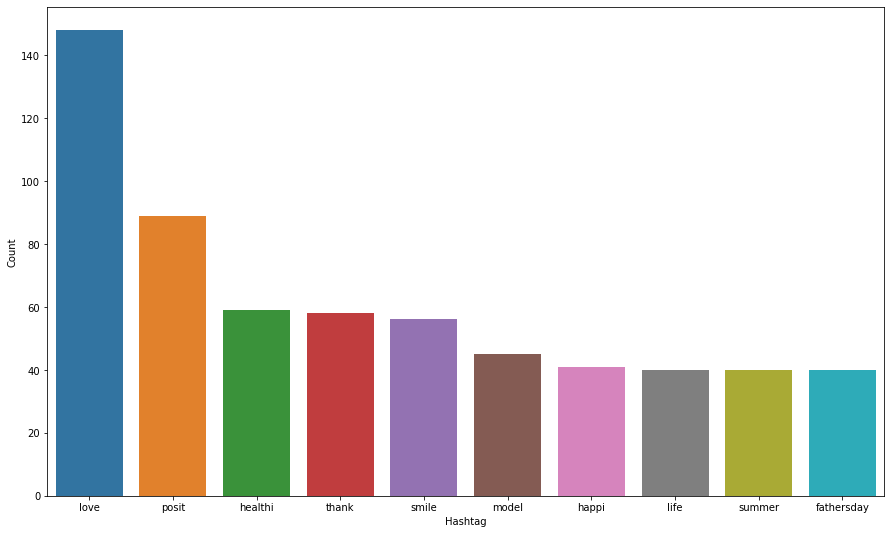

In [23]:
#select top 10 hastags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [24]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer= CountVectorizer(max_df=0.90, min_df=2,max_features=1000, stop_words='english')
bow= bow_vectorizer.fit_transform(df['clean_tweet'])

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow, df['id'],random_state=42, test_size=0.25)

In [26]:
#model training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score


In [31]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [32]:
pred= model.predict(x_test)
f1_score(y_test,pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
accuracy_score(y_test,pred)